### Step 1: Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.feature_extraction.text import *
from sklearn.metrics.pairwise import linear_kernel
from scipy.sparse import hstack
np.random.seed(0)

### Step 2: Define working directories

In [2]:
path_raw_data = 'C:/users/lbros/documents/mids/w207/final_project/raw_data/' 
ratings_file = 'ratings.csv'
movies_file = 'movies_metadata.csv'
credits_file = 'credits.csv'
keywords_file = 'keywords.csv'
links_file = 'links.csv'

### Step 3: Read data

In [3]:
# import the datasets
ratings_df = pd.read_csv(path_raw_data + ratings_file)
movies_df = pd.read_csv(path_raw_data + movies_file, low_memory=False)
#credits_df = pd.read_csv(path_raw_data + credits_file)
#keywords_df = pd.read_csv(path_raw_data + keywords_file)
links_df = pd.read_csv(path_raw_data + links_file)

### Step 4: Explore the data

### 4.1 Ratings Data

#### Overview

The ratings data has **26,024,289** ratings from **270,896 users** for **45,115 movies**.

Ratings data variables:
- **userId:** user identification
- **movieID:** movie identification
- **rating:** movie rating in a scale from 0 to 5 in intervals of 0.5
- **timestamp:** timestamp of the rating

There is **no-missing values**.

In [4]:
ratings_df.shape

(26024289, 4)

In [5]:
ratings_df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [6]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [7]:
num_users = ratings_df.userId.unique().shape[0]
num_users

270896

In [8]:
num_movies = ratings_df.movieId.unique().shape[0]
num_movies

45115

In [9]:
pd.isnull(ratings_df).sum(axis=0)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

#### Distribution of Ratings per User

Half of the users have 30 or lower ratings.

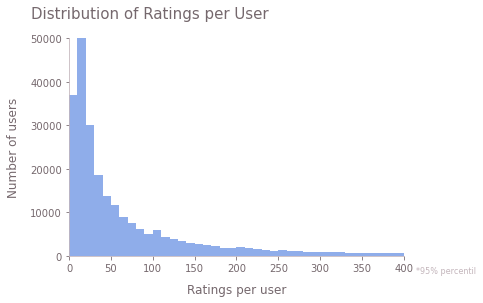

In [10]:
ratings_per_user = ratings_df.groupby('userId').count().rating
fig = plt.figure(figsize=(6, 4), facecolor='white')
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#C4B6BC')
ax.spines['left'].set_color('#C4B6BC')
ax.tick_params(axis='x', colors='#75686D')
ax.tick_params(axis='y', colors='#75686D')
ax.hist(ratings_per_user, bins=40, range=(0, 400), color='#8FADEA')
plt.text(x=415, y=-4000, s='*95% percentil', fontsize=8, color='#C4B6BC', ha='left')
plt.title('Distribution of Ratings per User', pad=20, fontsize=15, x=0.24, color='#75686D')
plt.ylabel('Number of users', fontsize=12, labelpad=10, color='#75686D')
plt.yticks(np.arange(0, 60000, step=10000))
plt.ylim((0, 50000))
plt.xlabel('Ratings per user', fontsize=12, labelpad=10, color='#75686D')
plt.xticks(np.arange(0, 450, step=50))
plt.xlim(0, 400)
plt.show()

In [11]:
round(ratings_per_user.describe(percentiles=np.arange(0.1, 1.0, step=0.1)), 1)

count    270896.0
mean         96.1
std         205.7
min           1.0
10%           6.0
20%          13.0
30%          16.0
40%          20.0
50%          30.0
60%          46.0
70%          72.0
80%         119.0
90%         236.0
max       18276.0
Name: rating, dtype: float64

#### Distribution of Ratings per Movie

Half of the movies have 8 or lower ratings.

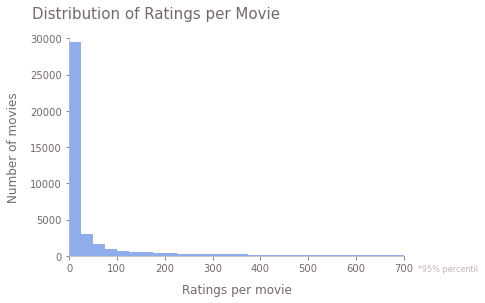

In [12]:
ratings_per_movie = ratings_df.groupby('movieId').count().rating
fig = plt.figure(figsize=(6, 4), facecolor='white')
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#C4B6BC')
ax.spines['left'].set_color('#C4B6BC')
ax.tick_params(axis='x', colors='#75686D')
ax.tick_params(axis='y', colors='#75686D')
ax.hist(ratings_per_movie, bins=28, range=(0,700), color='#8FADEA')
plt.text(x=730, y=-2100, s='*95% percentil', fontsize=8, color='#C4B6BC', ha='left')
plt.title('Distribution of Ratings per Movie', pad=20, fontsize=15, x=0.26, color='#75686D')
plt.ylabel('Number of movies', fontsize=12, labelpad=10, color='#75686D')
plt.yticks(np.arange(0, 40000, step=5000))
plt.ylim((0, 30000))
plt.xlabel('Ratings per movie', fontsize=12, labelpad=10, color='#75686D')
plt.xticks(np.arange(0, 800, step=100))
plt.xlim(0, 700)
plt.show()

In [13]:
round(ratings_per_movie.describe(percentiles=np.arange(0.1, 1.0, step=0.1)), 1)

count    45115.0
mean       576.8
std       3037.4
min          1.0
10%          1.0
20%          2.0
30%          3.0
40%          5.0
50%          8.0
60%         16.0
70%         39.0
80%        133.2
90%        695.0
max      91921.0
Name: rating, dtype: float64

#### Distribution of Ratings

Half of ratings are 3.5 or above.

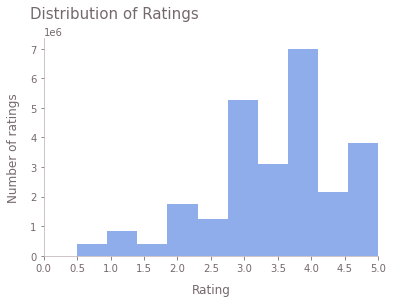

In [14]:
ratings = ratings_df.rating
fig = plt.figure(figsize=(6, 4), facecolor='white')
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#C4B6BC')
ax.spines['left'].set_color('#C4B6BC')
ax.tick_params(axis='x', colors='#75686D')
ax.tick_params(axis='y', colors='#75686D')
ax.hist(ratings, bins=10, color='#8FADEA')
plt.title('Distribution of Ratings', pad=20, fontsize=15, x=0.21, color='#75686D')
plt.ylabel('Number of ratings', fontsize=12, labelpad=10, color='#75686D')
plt.xlabel('Rating', fontsize=12, labelpad=10, color='#75686D')
plt.xticks(np.arange(0, 5.5, step=0.5))
plt.xlim(0, 5)
plt.show()

In [15]:
round(ratings.describe(percentiles=np.arange(0.1, 1.0, step=0.1)), 1)

count    26024289.0
mean            3.5
std             1.1
min             0.5
10%             2.0
20%             3.0
30%             3.0
40%             3.5
50%             3.5
60%             4.0
70%             4.0
80%             4.5
90%             5.0
max             5.0
Name: rating, dtype: float64

### 4.2 Movies Data

#### Overview

The movies data has metadata for **45,466** movies.

Movies data variables:
- **adult:** boolean to flag adult movies
- **belongs_to_collection:** collections to which the movie belongs
- **budget:** budget
- **genres:** genres to which the movie belongs
- **homepage:** movie homepage
- **id:** movie id (key to link to ratings dataset)
- **imdb_id:** imdb id
- **original_language:** original language
- **original_title:** original title
- **overview:** plot summary
- **popularity:** popularity rating
- **poster_path:** path to movie poster
- **production_companies:** production companies
- **production_countries:** production countries
- **release_date:** release date
- **revenue:** revenue
- **runtime:** runtime
- **spoken_languages:** spoken languages
- **status:** [Released, Rumored, Post Production, In Production, Planned, Canceled]
- **tagline:** tagline
- **title:** title
- **video:** boolean to flag video
- **vote_average:** average rating
- **vote_count:** number of ratings

**Missing values** specially on belongs_to_collection, homepage, poster_path and runtime. Number is greater than shown below due to empty lists within some fields.

In [16]:
# 45K movies
movies_df.shape

(45466, 24)

In [17]:
# 24 features
movies_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [18]:
# Inspect the movies columns
# Belongs to collection, genres contains dictionaries
# Genres and spoken languages contain lists of dictionaries, each with a name field that will need to be extracted
movies_df.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [19]:
# Some fields have unexpected object types
movies_df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [20]:
# Some columns contain missing values that will need to be addressed
# The number is greater than shown, due to empty lists within some fields
movies_df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

### Step 5: Data preprocessing

### 5.1 Movies Data

#### Filter columns

In [21]:
# columns to filter
selected_columns = ['imdb_id', 'belongs_to_collection', 'genres', 'original_language', 'production_countries', 'popularity', 'release_date', 'runtime', 'overview']
# copy selected columns to new DataFrame
new_df = movies_df[selected_columns].copy(deep=True)
# print df shape
print(new_df.shape)

(45466, 9)


#### Define imdb_1 as index

In [22]:
# get rid of NaN and ZERO values
new_df.drop(new_df[new_df['imdb_id'].isna()].index, axis=0, inplace=True)
new_df.drop(new_df[new_df['imdb_id']=='0'].index, axis=0, inplace=True)
# convert to format compatible with link data
new_df['imdb_id'] = new_df['imdb_id'].apply(lambda x: x[3:]).astype('int64')
# deduplicate 'imdb_id'
new_df.drop_duplicates(subset='imdb_id', keep='first', inplace=True)
# set 'imdb_id' as index
new_df.set_index('imdb_id', inplace=True)
# print df shape
print(new_df.shape)

(44765, 8)


#### Belongs_to_collection

Converts belongs_to_collection into boolean (yes|no)

In [23]:
# replace Nan values with empty stringified
to_replace_nan = "{'id': '', 'name': '', 'poster_path': '', 'backdrop_path': ''}" 
new_df['belongs_to_collection'] = new_df['belongs_to_collection'].fillna(to_replace_nan)
# convert stringified into python objects
new_df['belongs_to_collection'] = new_df['belongs_to_collection'].apply(literal_eval)
# replace unexpected float values with empty dict
to_replace_float = {'id': '', 'name': '', 'poster_path': '', 'backdrop_path': ''}
new_df['belongs_to_collection'] = new_df['belongs_to_collection'].apply(lambda x: to_replace_float if type(x)==float else x)
# convert 'belongs_to_collection' into boolean
new_df['belongs_to_collection'] = new_df['belongs_to_collection'].apply(lambda x: 0 if x.get('id')=='' else 1)
# print df shape
print(new_df.shape)
# print count of Nan values
print('nan_count:', new_df['belongs_to_collection'].isna().sum())

(44765, 8)
nan_count: 0


#### Genres

Hot encode genre names

In [24]:
# convert stringified into python objects
new_df['genres'] = new_df['genres'].apply(literal_eval)
# replace empty lists with 'unknown' genre
to_replace = [{'id': '', 'name': 'Unknown'}]
new_df['genres'] = new_df['genres'].apply(lambda x: to_replace if len(x)==0 else x)
# extract list of genre names per movie
new_df['genres'] = new_df['genres'].apply(lambda x: [i.get('name') for i in x])
# hot encode one column per genre name, drop empty genre column
temp_df = pd.get_dummies(new_df['genres'].apply(pd.Series).stack(), prefix='genre', prefix_sep='_').sum(level=0)
# join with new_df, drop temp column
new_df = new_df.join(temp_df).drop('genres', axis=1)
# print df shape
print(new_df.shape)
# print count of Nan values
print('nan_count:', new_df.isna().sum())

(44765, 28)
nan_count: belongs_to_collection      0
original_language         10
production_countries       3
popularity                 3
release_date              82
runtime                  247
overview                 919
genre_Action               0
genre_Adventure            0
genre_Animation            0
genre_Comedy               0
genre_Crime                0
genre_Documentary          0
genre_Drama                0
genre_Family               0
genre_Fantasy              0
genre_Foreign              0
genre_History              0
genre_Horror               0
genre_Music                0
genre_Mystery              0
genre_Romance              0
genre_Science Fiction      0
genre_TV Movie             0
genre_Thriller             0
genre_Unknown              0
genre_War                  0
genre_Western              0
dtype: int64


#### Original_language

Converts original_language into boolean (1 for 'english' | 0 for 'other languages')

In [25]:
# apply boolean transformation (1 for 'english' | 0 for 'non-english')
new_df['original_language'] = new_df['original_language'].apply(lambda x: 1 if x=='en' else 0)
# print df shape
print(new_df.shape)
# print count of Nan values
print('nan_count:', new_df['original_language'].isna().sum())

(44765, 28)
nan_count: 0


#### Production_countries

Converts production_countries into boolean (1 for 'US' | 0 for 'other countries')

In [26]:
# replace Nan values with empty stringified
to_replace_nan = "[{'iso_3166_1': '', 'name': ''}]" 
new_df['production_countries'] = new_df['production_countries'].fillna(to_replace_nan)
# convert stringified into python objects
new_df['production_countries'] = new_df['production_countries'].apply(literal_eval)
# replace unexpected float values or empty lists with list of empty dict
to_replace = [{'iso_3166_1': '', 'name': ''}]
new_df['production_countries'] = new_df['production_countries'].apply(lambda x: to_replace if type(x)==float else x)
new_df['production_countries'] = new_df['production_countries'].apply(lambda x: to_replace if len(x)==0 else x)
# extract list of production countries per movie
new_df['production_countries'] = new_df['production_countries'].apply(lambda x: [i.get('iso_3166_1') for i in x])
# apply boolean transformation (1 for 'US' | 0 for 'International')
new_df['production_countries'] = new_df['production_countries'].apply(lambda x: 1 if 'US' in x else 0)
# print df shape
print(new_df.shape)
# print count of Nan values
print('nan_count:', new_df['production_countries'].isna().sum())

(44765, 28)
nan_count: 0


#### Popularity

Converts popularity into boolean (1 for equal or above median | 0 otherwise)

In [27]:
# replace Nan values with zeros
new_df['popularity'] = new_df['popularity'].fillna('0.0')
# replace unexpected string with zero
new_df['popularity'] = new_df['popularity'].apply(lambda x: '0.0' if x=='Beware Of Frost Bites' else x)
# cast field to float
new_df['popularity'] = new_df['popularity'].astype(float)
# apply boolean transformation (1 for popularity equal or above median | 0 for below median)
new_df['popularity'] = new_df['popularity'].apply(lambda x: 1 if x >= new_df['popularity'].median() else 0)
# print df shape
print(new_df.shape)
# print count of Nan values
print('nan_count:', new_df['popularity'].isna().sum())

(44765, 28)
nan_count: 0


#### Release_date

Hot encode release_date by decade

In [28]:
# replace Nan values with string of zeros
new_df['release_date'] = new_df['release_date'].fillna('0000-00-00')
# capture the release year from string and cast as integer
new_df['release_date'] = new_df['release_date'].apply(lambda x: x[:4]).astype(int)
# convert strange values to zero
new_df['release_date'] = new_df['release_date'].apply(lambda x: 0 if x < 1800 else x)
# group release years by decade
bins = pd.IntervalIndex.from_tuples([(0, 1870)] + [(year, year + 10) for year in range(1870, 2020, 10)])
new_df['release_date'] = pd.cut(new_df['release_date'], bins)
# hot encode one column per release decade
temp_df = pd.get_dummies(new_df['release_date'], prefix='release', prefix_sep='').drop('release(0, 1870]', axis=1)
# join with new_df, drop original column
new_df = new_df.join(temp_df).drop('release_date', axis=1)
# print df shape
print(new_df.shape)
# print count of Nan values
print('nan_count:', new_df.isna().sum())

(44765, 42)
nan_count: belongs_to_collection      0
original_language          0
production_countries       0
popularity                 0
runtime                  247
overview                 919
genre_Action               0
genre_Adventure            0
genre_Animation            0
genre_Comedy               0
genre_Crime                0
genre_Documentary          0
genre_Drama                0
genre_Family               0
genre_Fantasy              0
genre_Foreign              0
genre_History              0
genre_Horror               0
genre_Music                0
genre_Mystery              0
genre_Romance              0
genre_Science Fiction      0
genre_TV Movie             0
genre_Thriller             0
genre_Unknown              0
genre_War                  0
genre_Western              0
release(1870, 1880]        0
release(1880, 1890]        0
release(1890, 1900]        0
release(1900, 1910]        0
release(1910, 1920]        0
release(1920, 1930]        0
release(1930, 1940] 

#### Runtime

Converts runtime into boolean (1 for equal or above median | 0 otherwise)

In [29]:
# replace Nan values with zeros
new_df['runtime'] = new_df['runtime'].fillna(0)
# apply boolean transformation (1 for runtime equal or above median | 0 for below median)
new_df['runtime'] = new_df['runtime'].apply(lambda x: 1 if x >= new_df['runtime'].median() else 0)
# print df shape
print(new_df.shape)
# print count of Nan values
print('nan_count:', new_df['runtime'].isna().sum())

(44765, 42)
nan_count: 0


#### Overview

Vectorize overview text using TfidVectorizer with binary output

In [30]:
# replace Nan values in overview with empty string
new_df['overview'] = new_df['overview'].fillna('')
# convert new_df to numpy array
a = np.array(new_df)
# save 'imdb_id' as index
index = np.array(new_df.index, dtype='int64')
# vectorize strings using TfidVectorizer with binary output
#vectorizer = TfidfVectorizer(strip_accents='ascii', lowercase=True, binary=True, max_features=500)
#b = vectorizer.fit_transform(a[:,5]).astype('uint8')
# delete overview field
a = np.delete(a, 5, axis=1)
# cast a as 'uint8' to save memory space
a = a.astype('uint8')
# hstack array with overview data
movies = a#hstack([a, b]).toarray()
# print movies shape
print(movies.shape)

(44765, 41)


### 5.1 Ratings Data

#### Convert movieId to imdbId using links_df

In [31]:
# dropping 'tmdbId' from links_df
links_df.drop('tmdbId', axis=1, inplace=True)
# set movieId as index on links_df
links_df.set_index('movieId', inplace=True)
# set userId and movieId as indexes on ratings_df
ratings_df.set_index(['userId', 'movieId'], inplace=True)
# insert imdbId column on ratings_df joining with links_df on movieId index
ratings_df = ratings_df.join(links_df, on='movieId', how='left').reset_index()
# drop moviedId columns
ratings_df.drop(['movieId'], axis=1, inplace=True)
# print ratings_df shape
print(ratings_df.shape)

(26024289, 4)


#### Drop ratings where movie not in cleaned movie dataset

In [32]:
ratings_df = ratings_df[np.isin(ratings_df['imdbId'], index)]
# print ratings_df shape
print(ratings_df.shape)

(23957481, 4)


#### Filter users with a minimum number of ratings

Defining **filter_users** function

In [33]:
def filter_users(ratings_df, min_ratings=30):
    
    '''Filter users with num_ratings equal or above [min_ratings]
    params: ratings_df, min_rating
    return: filtered_ratings_df
    '''
    
    # filter userIDs with count of ratings equal or above min_ratings
    filtered_ratings_df = ratings_df.groupby('userId', sort=False).filter(lambda x: len(x) >= min_ratings)
    
    return filtered_ratings_df

We filtered users with **less than 30 ratings** resulting in a filtered dataset with **131,880 users** (out of 270,896) and **29,233 movies** (out of 45,115).

In [34]:
filtered_ratings_df = filter_users(ratings_df, min_ratings=30)
num_users = filtered_ratings_df.userId.unique().shape[0]
num_users

131880

In [35]:
num_movies = filtered_ratings_df.imdbId.unique().shape[0]
num_movies

29233

#### Binarize ratings

Defining **binarize_ratings** function

In [36]:
def binarize_ratings(ratings_df, threshold=4):
    
    '''Binarize ratings:
    - 1 for ratings equal or above threshold
    - 0 for ratings below threshold
    params: ratings_df, threshold
    return: ratings_df with binarized ratings
    '''
    
    # binarize ratings field
    ratings_df['rating'] = ratings_df['rating'].apply(lambda x: 1 if x >= 4 else 0)
    
    return ratings_df

#### Split user ratings into train, dev and test sets

Defining **train_dev_test_split** function

In [37]:
def train_dev_test_split(ratings_df, min_ratings=30, threshold=4):
    
    '''Filter users with num_ratings equal or above [min_ratings]
    and split ratings by user into train, dev and test label sets
    using the hold one out method. Test contains the last rated movie
    by user, dev the last but one, while training contains all the
    other movies rated except the latest two.
    params: ratings_df, min_rating, threshold
    return: train_labels, dev_labels, test_labels
    '''
    
    # filter userIDs with count of ratings equal or above min_ratings
    filtered_ratings_df = filter_users(ratings_df, min_ratings)
    # binarize ratings
    bin_filtered_ratings_df = binarize_ratings(filtered_ratings_df, threshold)
    # compute the row indexes for the two most recent ratings by user (ie. two largest timestamps)
    most_recent_timestamps = bin_filtered_ratings_df.groupby('userId', sort=False)['timestamp'].nlargest(2).reset_index()
    # get the row indexes for the last rating by user
    idx_test = most_recent_timestamps.groupby(by='userId', sort=False)['level_1'].first()
    # get the row indexes for the last but one rating by user
    idx_dev = most_recent_timestamps.groupby(by='userId', sort=False)['level_1'].last()
    # filter test data with idx_test
    test_labels = np.array(bin_filtered_ratings_df.loc[idx_test].drop('timestamp', axis=1))
    # filter dev data with idx_dev
    dev_labels = np.array(bin_filtered_ratings_df.loc[idx_dev].drop('timestamp', axis=1))
    # filter train data with ~idx_text and ~idx_dev
    train_labels = np.array(bin_filtered_ratings_df.loc[~bin_filtered_ratings_df.index.isin(most_recent_timestamps['level_1'])].drop('timestamp', axis=1))
    
    return train_labels, dev_labels, test_labels

We splitted the **22,040,571 filtered examples** (out of 26,024,289) in train, development and test sets, being **21,776,811 examples in training** data, **131,880 examples in development** data, and **131,880 examples in test** data.

Test contains the last rated movie by user, dev the last but one, while training contains all the other movies rated by the user except the latest two.

In [38]:
train_labels, dev_labels, test_labels = train_dev_test_split(ratings_df)

In [39]:
print('Total filtered examples:', filtered_ratings_df.shape[0])

Total filtered examples: 22040571


In [40]:
print('Train size:', train_labels.shape[0])
print('Development size:', dev_labels.shape[0])
print('Test size:', test_labels.shape[0])

Train size: 21776811
Development size: 131880
Test size: 131880


### Step 6: Content-based recommender system implementation

#### 6.1 Similarity score

In [54]:
def get_movie_vector(user_movie_Ids):
    index_matching = np.apply_along_axis(lambda x: np.hstack((x, (index==x[1]).sum())), 1, user_movie_Ids)
    index_matched = index_matching[index_matching[:,2]==1][:,[0,1]]
    movie_vector = np.apply_along_axis(lambda x: np.hstack((x[0], movies[np.argsort(index==x[1])[-1]])), 1, index_matched)
    return movie_vector

In [55]:
def get_user_vector(userIds):
    rated_movies = train_labels[np.isin(train_labels[:,0], userIds)]
    liked_movies = rated_movies[rated_movies[:,1]==1][:,[0,2]]
    movie_vector = get_movie_vector(liked_movies)
    user_vector = np.array(pd.DataFrame(movie_vector).groupby(0).mean().reset_index())
    return user_vector

In [56]:
def get_target_movie(userIds, mode='dev'):
    mapper = {'dev':0, 'test':1}
    movie_list = [dev_labels[np.isin(dev_labels[:,0], userIds)][:,[0,2]], test_labels[np.isin(test_labels[:,0], userIds)][:,[0,2]]]
    target_movie = movie_list[mapper[mode]]
    return target_movie

In [57]:
def get_target_rating(userIds, mode='dev'):
    mapper = {'dev':0, 'test':1}
    rating_list = [dev_labels[np.isin(dev_labels[:,0], userIds)][:,[0,1]], test_labels[np.isin(test_labels[:,0], userIds)][:,[0,1]]]
    target_rating = rating_list[mapper[mode]]
    return target_rating

In [58]:
def get_rec_set(userIds, mode='dev'):
    mapper = {'dev':0, 'test':1}
    target_movie = get_target_movie(userIds, mode)
    a = np.tile(userIds,(1,99)).T
    b = np.random.choice(index, size=len(a), replace=True).reshape(len(a),1)
    random_movies = np.hstack((a, b))
    rec_set = np.vstack((target_movie, random_movies))
    return rec_set

In [59]:
def get_cosine_sim(userIds, mode='dev'):
    user_vector = get_user_vector(userIds)
    rec_set = get_rec_set(userIds, mode)
    movie_vector = get_movie_vector(rec_set)
    num_cols = len(userIds)
    num_rows = len(rec_set) + 1
    label_cols = user_vector[:,0].reshape(1, num_cols)
    label_rows = np.hstack((0, movie_vector[:,0])).reshape(num_rows, 1)
    cosine_sim = linear_kernel(movie_vector[:,1:], user_vector[:,1:], dense_output=False)
    cosine_sim = np.vstack((label_cols, cosine_sim))
    cosine_sim = np.hstack((label_rows, cosine_sim))
    return cosine_sim

In [60]:
def get_diag_matrix(cosine_sim):
    n_rows = cosine_sim.shape[0]
    n_cols = cosine_sim.shape[1]
    label_rows = np.ones((n_rows, 1))
    label_cols = np.ones((1, n_cols-1))
    fill = np.tile(np.eye(n_cols-1),(100,1))
    matrix = np.hstack((label_rows, np.vstack((label_cols, fill))))
    return matrix

In [61]:
def get_target_rank(userIds, mode='dev'):
    num_users = len(userIds)
    user_idx = np.arange(num_users)
    cosine_sim = get_cosine_sim(userIds, mode)
    diag_cosine_sim = cosine_sim * get_diag_matrix(cosine_sim)
    sort_idx = np.apply_along_axis(lambda x: np.argsort(x), 0, diag_cosine_sim[1:,1:])
    rank_by_user_idx = np.array(np.where(sort_idx==user_idx)).T
    rank_by_user = np.apply_along_axis(lambda x: np.hstack((userIds[x[1],], x[0]-(num_users-1)*100)), 1, rank_by_user_idx)
    return rank_by_user

In [62]:
def get_user_score(userIds, mode='dev'):
    target_rating = get_target_rating(userIds, mode)
    sort_target_rating = target_rating[np.argsort(target_rating[:,0])]
    target_rank = get_target_rank(userIds, mode)
    sort_target_rank = target_rank[np.argsort(target_rank[:,0])]
    merged_array = np.hstack((sort_target_rating, sort_target_rank))[:,[0,1,3]]
    func = lambda x: 1 if ((x[1]==1) & (x[2]<10)) | ((x[1]==0) & (x[2]>89)) else 0
    temp_score = np.apply_along_axis(func, 1, merged_array).reshape(merged_array.shape[0], 1)
    final_score = np.hstack((merged_array, temp_score))[:,[0,3]]
    return final_score

In [63]:
def get_hit_ratio(userIds, mode='dev'):
    scores = get_user_score(userIds, mode)
    hit_ratio = scores[:,1].sum() / scores.shape[0]
    return hit_ratio

In [64]:
def get_userIds(num_users):
    userIds = np.random.choice(np.unique(train_labels[:,0]), size=num_users, replace=False) 
    return userIds

In [79]:
def run_sim_score(num_users, n_rounds):
    results = []
    for n in np.arange(n_rounds):
        userIds = get_userIds(num_users)
        hit_ratio = get_hit_ratio(userIds)
        results.append(hit_ratio)
    return pd.Series(results)

In [90]:
results = run_sim_score(50, 100)

In [91]:
results.describe()

count    100.000000
mean       0.281200
std        0.062914
min        0.120000
25%        0.240000
50%        0.280000
75%        0.320000
max        0.460000
dtype: float64